In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('temp_data.csv')

# Display the first few rows of the dataset
print(df.head())


                                    Headline        Date
0        Stocks Surge Amid Economic Optimism  2023-07-10
1              Tech Stocks Lead Market Rally  2023-07-02
2       Inflation Concerns Hit Retail Sector  2023-07-12
3         Major Bank Reports Strong Earnings  2023-07-04
4  Healthcare Stocks React to Policy Changes  2023-07-05


In [2]:
# Display the column names
print(df.columns)


Index(['Headline', 'Date'], dtype='object')


In [3]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
file_path = 'temp_data.csv'  # Update with your actual file path
data = pd.read_csv(file_path, parse_dates=['Date'])

# Count headlines per day
daily_headlines = data.groupby('Date').size()

# Create a DataFrame for time series analysis
time_series_data = pd.DataFrame({'Date': daily_headlines.index, 'Headlines_Count': daily_headlines.values})
time_series_data.set_index('Date', inplace=True)


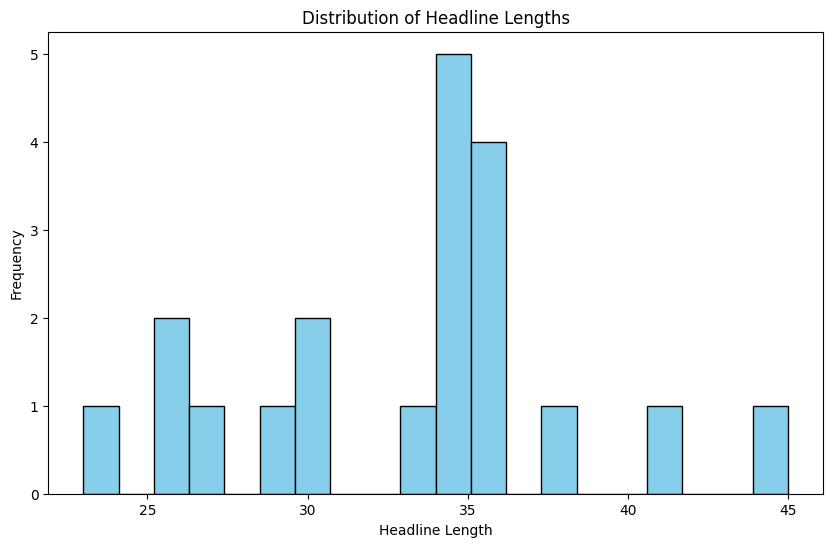

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate headline lengths
data['Headline_Length'] = data['Headline'].apply(len)

# Plot the distribution of headline lengths
plt.figure(figsize=(10, 6))
plt.hist(data['Headline_Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


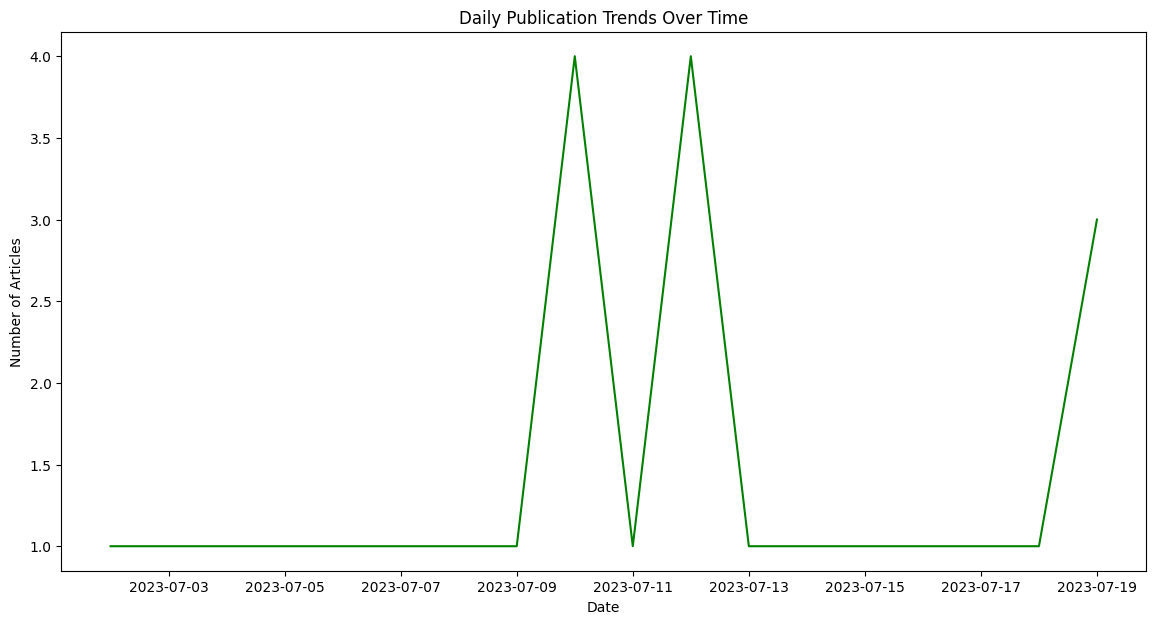

In [6]:
# Convert publication dates to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Count the number of articles published on each date
daily_counts = data['Date'].value_counts().sort_index()

# Plot the trend of publication over time
plt.figure(figsize=(14, 7))
plt.plot(daily_counts.index, daily_counts.values, color='green')
plt.title('Daily Publication Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


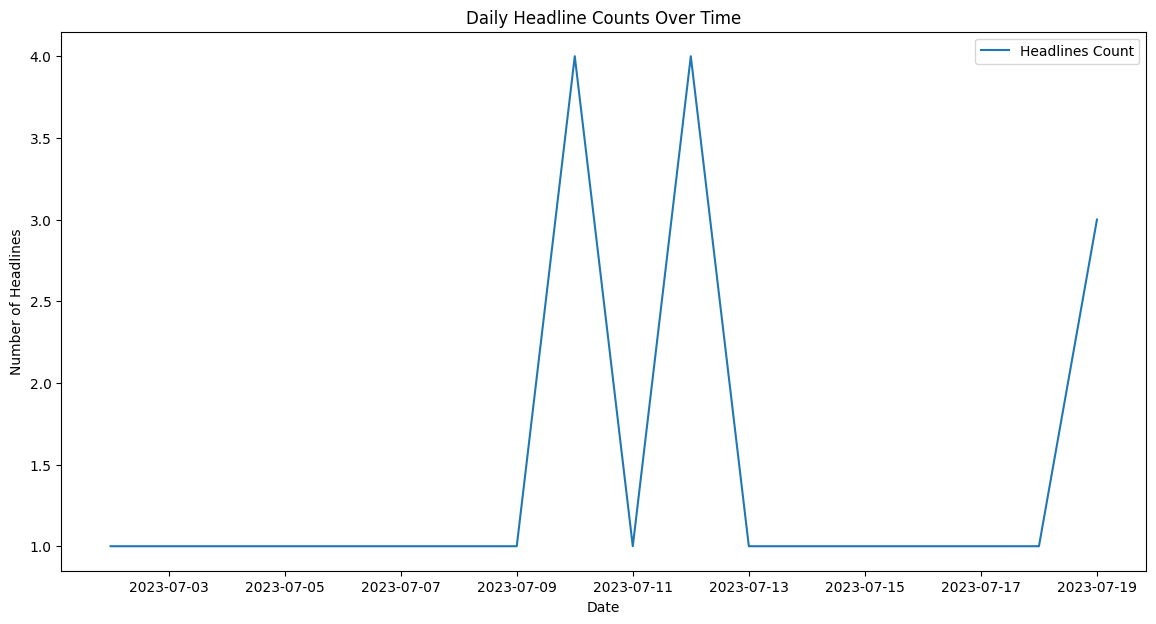

In [7]:
# Plot the daily headline counts
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index, time_series_data['Headlines_Count'], label='Headlines Count')
plt.title('Daily Headline Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Headlines')
plt.legend()
plt.show()


In [8]:
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=4)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

NameError: name 'seasonal_decompose' is not defined

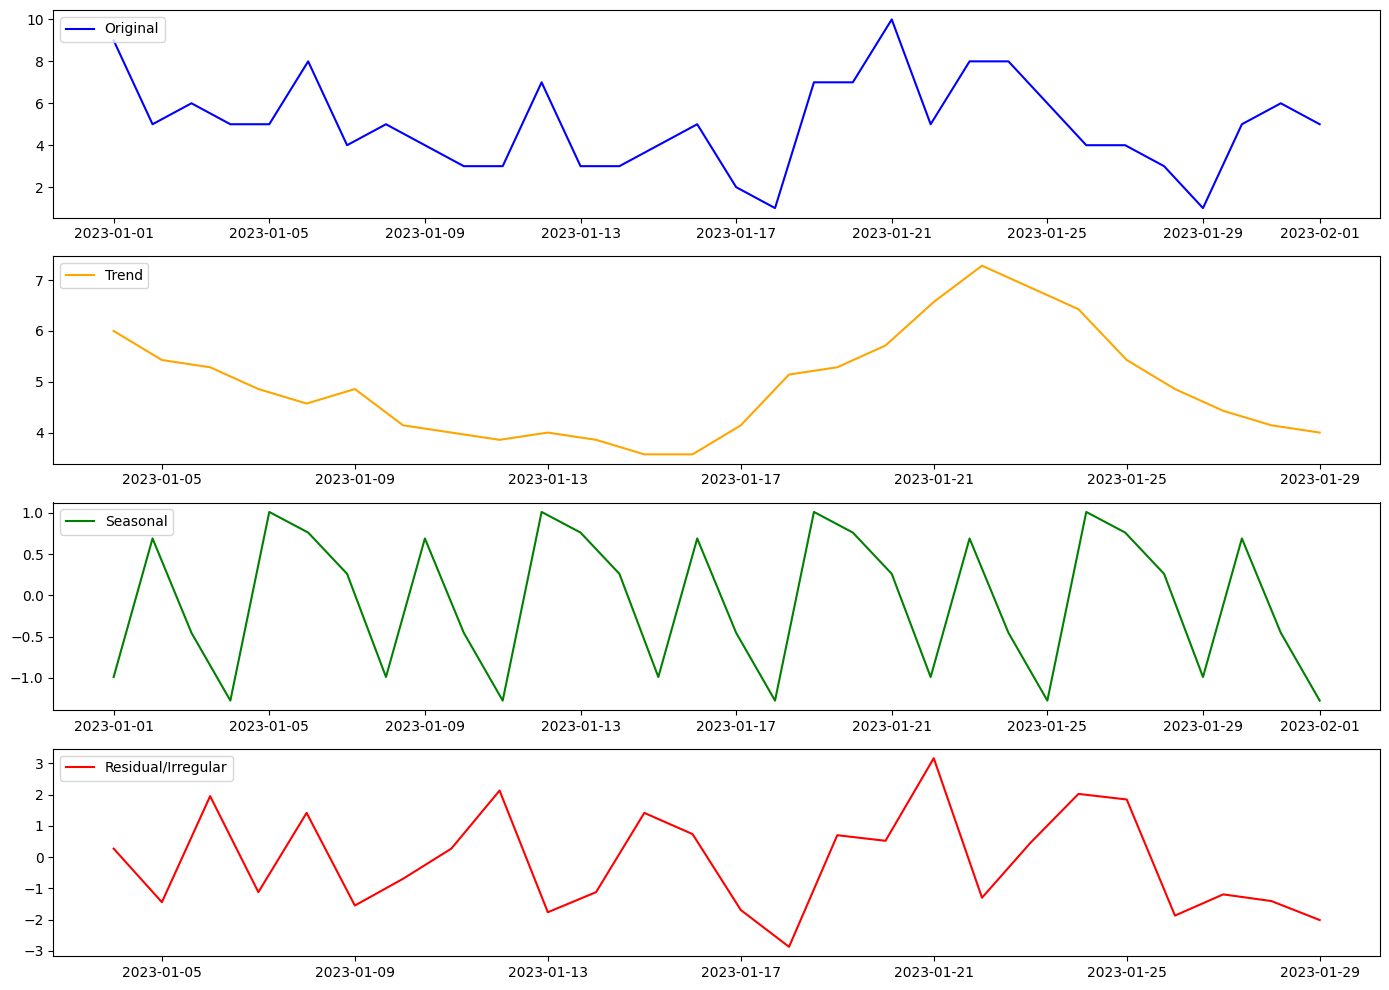

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



# Simulating data
np.random.seed(0)
dates = pd.date_range(start="2023-01-01", end="2023-02-01", freq='D')
headline_counts = np.random.poisson(lam=5, size=len(dates))  # Simulate headline counts

# Creating a DataFrame
simulated_data = pd.DataFrame({'Date': dates, 'Headlines_Count': headline_counts})

# Set 'Date' as index
simulated_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(simulated_data['Headlines_Count'], model='additive', period=7)

# Plotting the components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(simulated_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')


plt.subplot(414)
plt.plot(decomposition.resid, label='Residual/Irregular', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()